# Load the New Results SIM and NSS

In [1]:
import os
os.chdir('../saliency_model/')

import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib

import pandas as pd
import seaborn as sns
from glob import glob

matplotlib.rcParams.update({'font.size': 15})

### Pick Metric
NSS, SIM, IG, AUC

In [2]:
os.chdir('../results/')
glob('*.p')

['19-02-01_results_over_baseline_faces_07.p',
 '19-02-01_results_plain_models.p',
 '19-02-01_results_face_07.p',
 '19-02-01_results_over_baseline_faces_05.p',
 '2019-05-11_results-with-std.p',
 '19-02-01_results_over_baseline_faces_03.p',
 '19-01-31_results.p',
 '19-02-01_results_face_03.p',
 '19-02-01_results_face_05.p']

## Pick the Dataset and Load Required Data

In [3]:
# loading the files
os.chdir('../results/')
(summary, context, model, metric) = pickle.load(open( "2019-05-11_results-with-std.p", "rb")) 

In [4]:
print(np.shape(summary))
print(context)
print(model)
print(metric)

(6, 5, 8)
['all', 'person', 'no person', 'animal', 'sports', 'electronic']
['gbvs', 'gbvs_face_03', 'gbvs_face_05', 'gbvs_face_07', 'dg']
['nss mean', 'sim mean', 'ig mean', 'auc mean', 'nss std', 'sim std', 'ig std', 'auc std']


In [5]:
nss_mean = summary[:,:,0]
sim_mean = summary[:,:,1]
ig_mean = summary[:,:,2]
auc_mean = summary[:,:,3]

nss_std = summary[:,:,4]
sim_std = summary[:,:,5]
ig_std = summary[:,:,6]
auc_std = summary[:,:,7]

### NSS

In [6]:
df_nss_mean = pd.DataFrame(data=nss_mean, columns=model, index=context)
df_nss_std = pd.DataFrame(data=nss_std, columns=model, index=context)

In [7]:
df_nss_mean.head()

,gbvs,gbvs_face_03,gbvs_face_05,gbvs_face_07,dg
all,0.930722,0.952308,0.969970,0.979199,1.007740
person,0.981991,1.017286,1.045364,1.059780,1.091062
no person,0.847613,0.846974,0.847754,0.848574,0.872670
animal,0.866363,0.877877,0.887882,0.896216,1.028912
sports,1.175780,1.190304,1.199123,1.195571,1.201838


In [8]:
df_nss_std.head()

,gbvs,gbvs_face_03,gbvs_face_05,gbvs_face_07,dg
all,0.461819,0.469714,0.487059,0.513763,0.762227
person,0.492366,0.500592,0.522786,0.560281,0.829555
no person,0.393520,0.392585,0.393179,0.394172,0.614622
animal,0.438196,0.446218,0.457478,0.470939,0.701603
sports,0.583656,0.597248,0.610144,0.619274,0.823941


### SIM

In [9]:
df_sim_mean = pd.DataFrame(data=sim_mean, columns=model, index=context)
df_sim_std = pd.DataFrame(data=sim_std, columns=model, index=context)

In [10]:
df_sim_mean.head()

,gbvs,gbvs_face_03,gbvs_face_05,gbvs_face_07,dg
all,0.579692,0.583638,0.588542,0.595868,0.642767
person,0.547139,0.553899,0.561783,0.573428,0.630332
no person,0.632463,0.631847,0.631919,0.632245,0.662924
animal,0.532250,0.532606,0.533836,0.536224,0.623571
sports,0.524310,0.527445,0.531272,0.537579,0.623714


In [11]:
df_sim_std.head()

,gbvs,gbvs_face_03,gbvs_face_05,gbvs_face_07,dg
all,0.119425,0.116341,0.113803,0.111053,0.093276
person,0.109045,0.105797,0.103485,0.101506,0.095005
no person,0.116636,0.116508,0.116375,0.116115,0.086693
animal,0.115577,0.114920,0.114527,0.114169,0.084651
sports,0.100708,0.099006,0.097800,0.096986,0.116229


## Plot by Metric, including Std

### SIM

#### Get DF

In [17]:
print(df_sim_mean.head(2))
print(df_sim_std.head(2))

            gbvs  gbvs_face_03  gbvs_face_05  gbvs_face_07        dg
all     0.579692      0.583638      0.588542      0.595868  0.642767
person  0.547139      0.553899      0.561783      0.573428  0.630332
            gbvs  gbvs_face_03  gbvs_face_05  gbvs_face_07        dg
all     0.119425      0.116341      0.113803      0.111053  0.093276
person  0.109045      0.105797      0.103485      0.101506  0.095005


In [18]:
dg_mean = df_sim_mean['dg']
dg_std = df_sim_std ['dg']

In [19]:
gbvs_mean = df_sim_mean['gbvs']
gbvs_std = df_sim_std ['gbvs']

In [20]:
gbvs_mean_f03 = df_sim_mean['gbvs_face_03']
gbvs_std_f03 = df_sim_std ['gbvs_face_03']

In [21]:
gbvs_mean_f05 = df_sim_mean['gbvs_face_05']
gbvs_std_f05 = df_sim_std ['gbvs_face_05']

In [22]:
gbvs_mean_f07 = df_sim_mean['gbvs_face_07']
gbvs_std_f07 = df_sim_std ['gbvs_face_07']

#### Plot GBVS alone

In [23]:
t = np.arange(0,6)
d = 0.8
m = 8

In [24]:
matplotlib.rcParams.update({'font.size': 16})

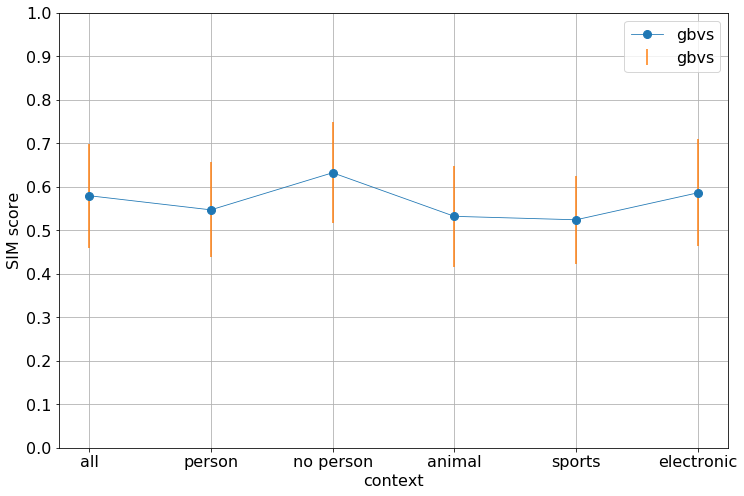

In [25]:
plt.subplots(figsize=(12,8))
plt.plot(gbvs_mean, '-o', label='gbvs', linewidth=d, markersize=m);
plt.errorbar(t, gbvs_mean, gbvs_std, linestyle='None')

plt.grid()
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.ylabel('SIM score')
plt.xlabel('context')
plt.legend();

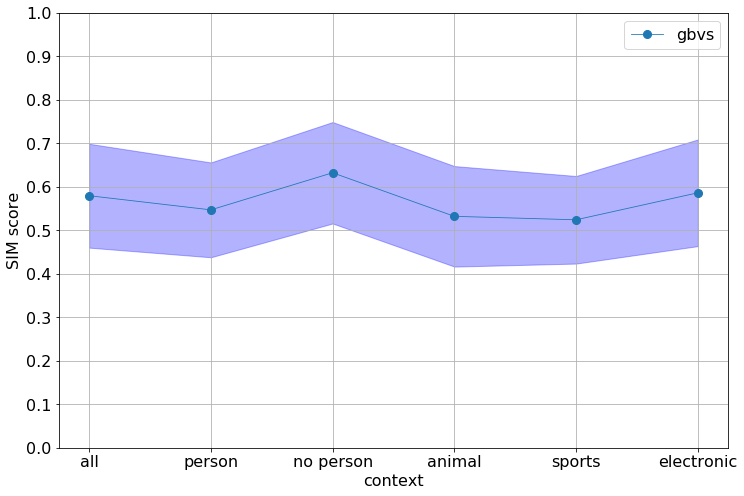

In [26]:
plt.subplots(figsize=(12,8))
plt.plot(gbvs_mean, '-o', label='gbvs', linewidth=d, markersize=m);
plt.fill_between(t, gbvs_mean - gbvs_std, gbvs_mean + gbvs_std, color='b', alpha=0.3)

plt.grid()
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.ylabel('SIM score')
plt.xlabel('context')
plt.legend();

### Plot GBVS + GBVS_f07 + DG

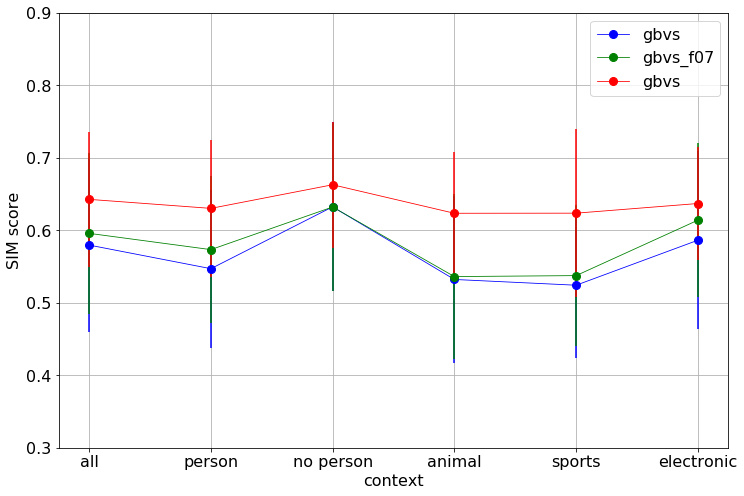

In [27]:
plt.subplots(figsize=(12,8))

plt.plot(gbvs_mean, '-o', label='gbvs', linewidth=d, markersize=m, c='b');
plt.errorbar(t, gbvs_mean, gbvs_std, linestyle='None', c='b', label=None)

plt.plot(gbvs_mean_f07, '-o', label='gbvs_f07', linewidth=d, markersize=m, c='g');
plt.errorbar(t, gbvs_mean_f07, gbvs_std_f07, linestyle='None', c='g', label=None)

plt.plot(dg_mean, '-o', label='gbvs', linewidth=d, markersize=m, c='r');
plt.errorbar(t, dg_mean, dg_std, linestyle='None', c='r', label=None)

plt.grid()
plt.yticks(np.arange(0.3, 1, step=0.1))
plt.ylabel('SIM score')
plt.xlabel('context')
plt.legend();

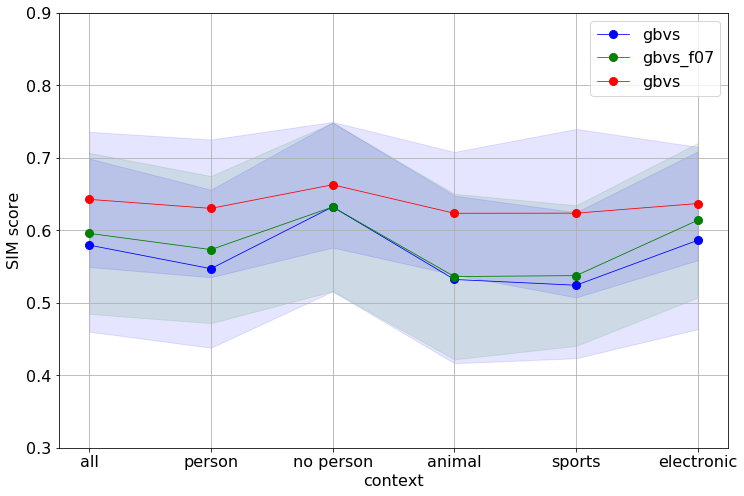

In [28]:
plt.subplots(figsize=(12,8))
plt.plot(gbvs_mean, '-o', label='gbvs', linewidth=d, markersize=m, c='b');
plt.fill_between(t, gbvs_mean - gbvs_std, gbvs_mean + gbvs_std, color='b', alpha=0.1)

plt.plot(gbvs_mean_f07, '-o', label='gbvs_f07', linewidth=d, markersize=m, c='g');
plt.fill_between(t, gbvs_mean_f07 - gbvs_std_f07, gbvs_mean_f07 + gbvs_std_f07, color='g', alpha=0.1)

plt.plot(dg_mean, '-o', label='gbvs', linewidth=d, markersize=m, c='r');
plt.fill_between(t, dg_mean - dg_std, dg_mean + dg_std, color='b', alpha=0.1)

plt.grid()
plt.yticks(np.arange(0.3, 1, step=0.1))
plt.ylabel('SIM score')
plt.xlabel('context')
plt.legend();

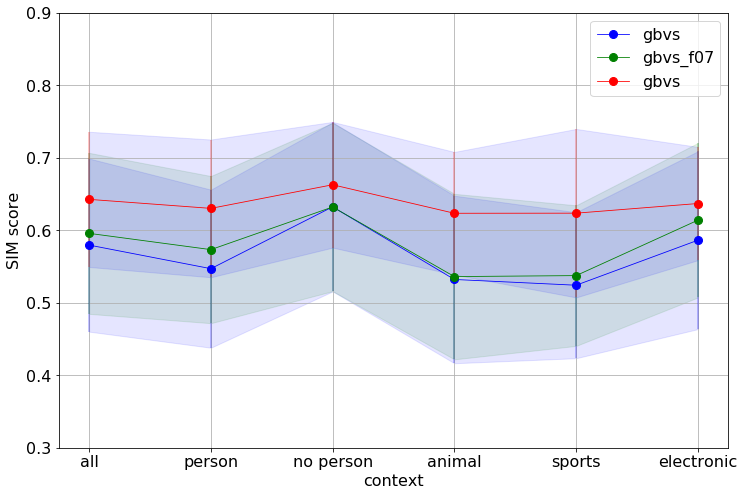

In [29]:
plt.subplots(figsize=(12,8))

plt.plot(gbvs_mean, '-o', label='gbvs', linewidth=d, markersize=m, c='b');
plt.errorbar(t, gbvs_mean, gbvs_std, linestyle='None', c='b', label=None, alpha=0.3)
plt.fill_between(t, gbvs_mean - gbvs_std, gbvs_mean + gbvs_std, color='b', alpha=0.1)

plt.plot(gbvs_mean_f07, '-o', label='gbvs_f07', linewidth=d, markersize=m, c='g');
plt.errorbar(t, gbvs_mean_f07, gbvs_std_f07, linestyle='None', c='g', label=None, alpha=0.3)
plt.fill_between(t, gbvs_mean_f07 - gbvs_std_f07, gbvs_mean_f07 + gbvs_std_f07, color='g', alpha=0.1)

plt.plot(dg_mean, '-o', label='gbvs', linewidth=d, markersize=m, c='r');
plt.errorbar(t, dg_mean, dg_std, linestyle='None', c='r', label=None, alpha=0.3)
plt.fill_between(t, dg_mean - dg_std, dg_mean + dg_std, color='b', alpha=0.1)

plt.grid()
plt.yticks(np.arange(0.3, 1, step=0.1))
plt.ylabel('SIM score')
plt.xlabel('context')
plt.legend();

### Plot GBVS + GBVS_f07 + GBVS_f05 + GBVS_f03 + DG

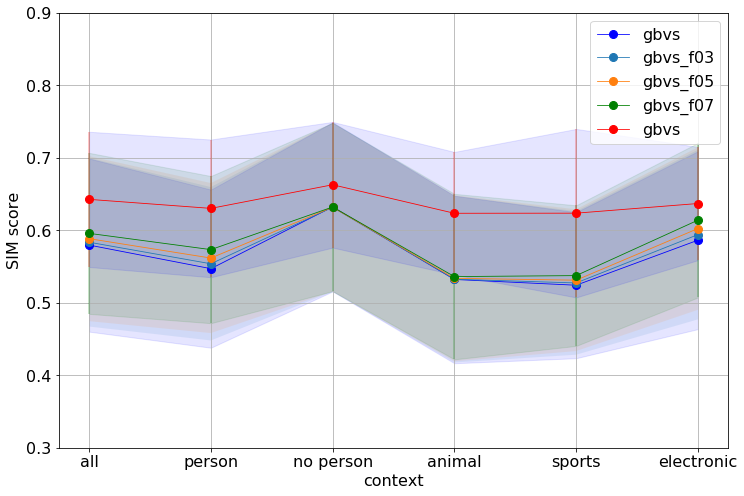

In [30]:
plt.subplots(figsize=(12,8))

plt.plot(gbvs_mean, '-o', label='gbvs', linewidth=d, markersize=m, c='b');
plt.fill_between(t, gbvs_mean - gbvs_std, gbvs_mean + gbvs_std, color='b', alpha=0.1)


plt.plot(gbvs_mean_f03, '-o', label='gbvs_f03', linewidth=d, markersize=m);
plt.fill_between(t, gbvs_mean_f03 - gbvs_std_f03, gbvs_mean_f03 + gbvs_std_f03, alpha=0.1)

plt.plot(gbvs_mean_f05, '-o', label='gbvs_f05', linewidth=d, markersize=m);
plt.fill_between(t, gbvs_mean_f05 - gbvs_std_f05, gbvs_mean_f05 + gbvs_std_f05, alpha=0.1)

plt.plot(gbvs_mean_f07, '-o', label='gbvs_f07', linewidth=d, markersize=m, c='g');
plt.errorbar(t, gbvs_mean_f07, gbvs_std_f07, linestyle='None', c='g', label=None, alpha=0.3)
plt.fill_between(t, gbvs_mean_f07 - gbvs_std_f07, gbvs_mean_f07 + gbvs_std_f07, color='g', alpha=0.1)

plt.plot(dg_mean, '-o', label='gbvs', linewidth=d, markersize=m, c='r');
plt.errorbar(t, dg_mean, dg_std, linestyle='None', c='r', label=None, alpha=0.3)
plt.fill_between(t, dg_mean - dg_std, dg_mean + dg_std, color='b', alpha=0.1)

plt.grid()
plt.yticks(np.arange(0.3, 1, step=0.1))
plt.ylabel('SIM score')
plt.xlabel('context')
plt.legend();

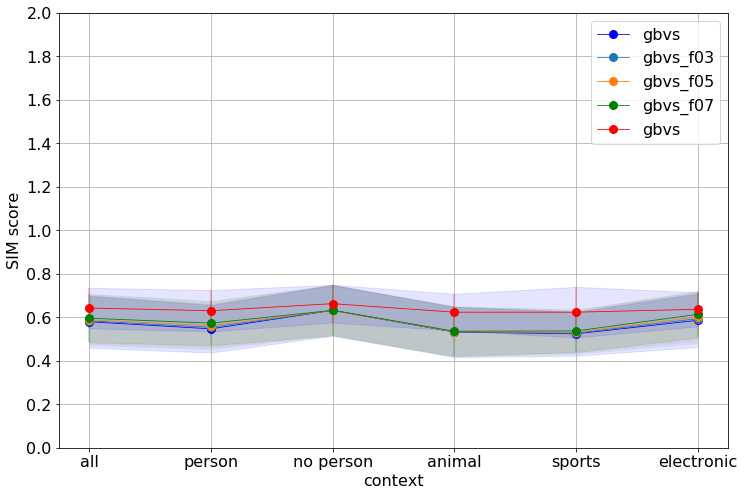

In [31]:
plt.subplots(figsize=(12,8))

plt.plot(gbvs_mean, '-o', label='gbvs', linewidth=d, markersize=m, c='b');
plt.fill_between(t, gbvs_mean - gbvs_std, gbvs_mean + gbvs_std, color='b', alpha=0.1)


plt.plot(gbvs_mean_f03, '-o', label='gbvs_f03', linewidth=d, markersize=m);
plt.fill_between(t, gbvs_mean_f03 - gbvs_std_f03, gbvs_mean_f03 + gbvs_std_f03, alpha=0.1)

plt.plot(gbvs_mean_f05, '-o', label='gbvs_f05', linewidth=d, markersize=m);
plt.fill_between(t, gbvs_mean_f05 - gbvs_std_f05, gbvs_mean_f05 + gbvs_std_f05, alpha=0.1)

plt.plot(gbvs_mean_f07, '-o', label='gbvs_f07', linewidth=d, markersize=m, c='g');
plt.errorbar(t, gbvs_mean_f07, gbvs_std_f07, linestyle='None', c='g', label=None, alpha=0.3)
plt.fill_between(t, gbvs_mean_f07 - gbvs_std_f07, gbvs_mean_f07 + gbvs_std_f07, color='g', alpha=0.1)

plt.plot(dg_mean, '-o', label='gbvs', linewidth=d, markersize=m, c='r');
plt.errorbar(t, dg_mean, dg_std, linestyle='None', c='r', label=None, alpha=0.3)
plt.fill_between(t, dg_mean - dg_std, dg_mean + dg_std, color='b', alpha=0.1)

plt.grid()
plt.yticks(np.arange(0.0, 2.1, step=0.2))
plt.ylabel('SIM score')
plt.xlabel('context')
plt.legend();

### Plot GBVS + GBVS_f07 + GBVS_f05 + GBVS_f03

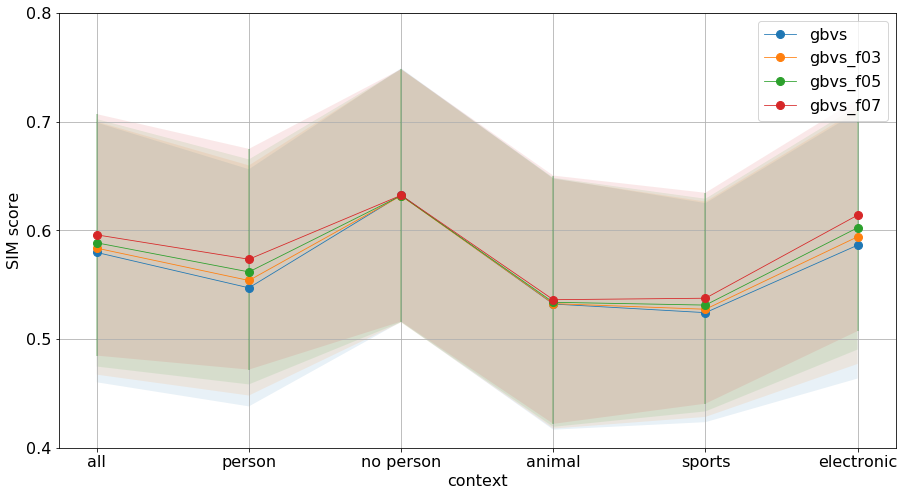

In [32]:
plt.subplots(figsize=(15,8))

plt.plot(gbvs_mean, '-o', label='gbvs', linewidth=d, markersize=m);
plt.fill_between(t, gbvs_mean - gbvs_std, gbvs_mean + gbvs_std, alpha=0.1)


plt.plot(gbvs_mean_f03, '-o', label='gbvs_f03', linewidth=d, markersize=m);
plt.fill_between(t, gbvs_mean_f03 - gbvs_std_f03, gbvs_mean_f03 + gbvs_std_f03, alpha=0.1)

plt.plot(gbvs_mean_f05, '-o', label='gbvs_f05', linewidth=d, markersize=m);
plt.fill_between(t, gbvs_mean_f05 - gbvs_std_f05, gbvs_mean_f05 + gbvs_std_f05, alpha=0.1)

plt.plot(gbvs_mean_f07, '-o', label='gbvs_f07', linewidth=d, markersize=m);
plt.errorbar(t, gbvs_mean_f07, gbvs_std_f07, linestyle='None', c='g', label=None, alpha=0.3)
plt.fill_between(t, gbvs_mean_f07 - gbvs_std_f07, gbvs_mean_f07 + gbvs_std_f07, alpha=0.1)

plt.grid()
plt.yticks(np.arange(0.4, .9, step=0.1))
plt.ylabel('SIM score')
plt.xlabel('context')
plt.legend();

### NSS

#### Get DF

In [33]:
print(df_nss_mean.head(2))
print(df_nss_std.head(2))

            gbvs  gbvs_face_03  gbvs_face_05  gbvs_face_07        dg
all     0.930722      0.952308      0.969970      0.979199  1.007740
person  0.981991      1.017286      1.045364      1.059780  1.091062
            gbvs  gbvs_face_03  gbvs_face_05  gbvs_face_07        dg
all     0.461819      0.469714      0.487059      0.513763  0.762227
person  0.492366      0.500592      0.522786      0.560281  0.829555


In [34]:
dg_mean = df_nss_mean['dg']
dg_std = df_nss_std ['dg']

In [35]:
gbvs_mean = df_nss_mean['gbvs']
gbvs_std = df_nss_std ['gbvs']

In [36]:
gbvs_mean_f03 = df_nss_mean['gbvs_face_03']
gbvs_std_f03 = df_nss_std ['gbvs_face_03']

In [37]:
gbvs_mean_f05 = df_nss_mean['gbvs_face_05']
gbvs_std_f05 = df_nss_std ['gbvs_face_05']

In [38]:
gbvs_mean_f07 = df_nss_mean['gbvs_face_07']
gbvs_std_f07 = df_nss_std ['gbvs_face_07']

#### Plot GBVS alone

In [39]:
t = np.arange(0,6)
d = 0.8
m = 8

In [40]:
matplotlib.rcParams.update({'font.size': 16})

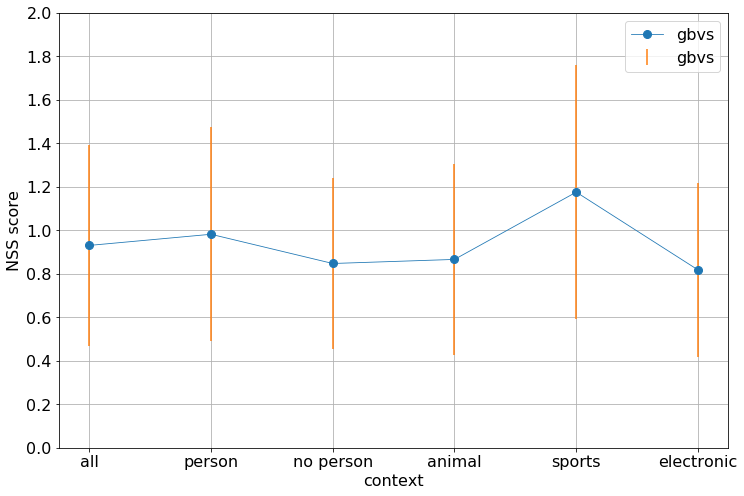

In [41]:
plt.subplots(figsize=(12,8))
plt.plot(gbvs_mean, '-o', label='gbvs', linewidth=d, markersize=m);
plt.errorbar(t, gbvs_mean, gbvs_std, linestyle='None')

plt.grid()
plt.yticks(np.arange(0, 2.1, step=0.2))
plt.ylabel('NSS score')
plt.xlabel('context')
plt.legend();

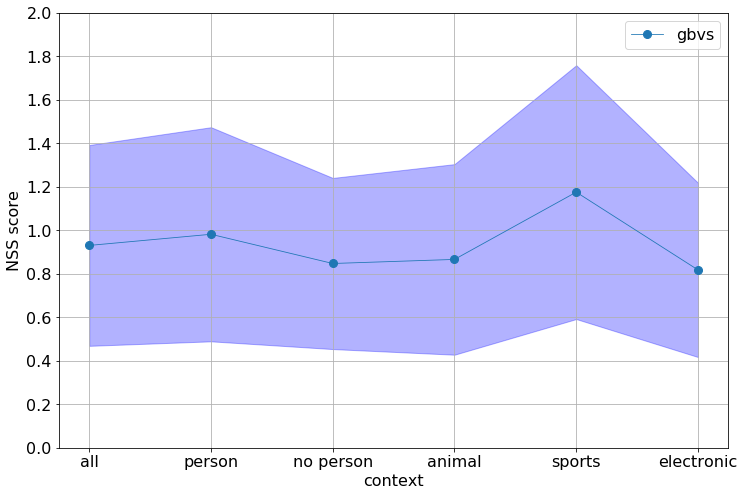

In [42]:
plt.subplots(figsize=(12,8))
plt.plot(gbvs_mean, '-o', label='gbvs', linewidth=d, markersize=m);
plt.fill_between(t, gbvs_mean - gbvs_std, gbvs_mean + gbvs_std, color='b', alpha=0.3)

plt.grid()
plt.yticks(np.arange(0, 2.1, step=0.2))
plt.ylabel('NSS score')
plt.xlabel('context')
plt.legend();

### Plot GBVS + GBVS_f07 + DG

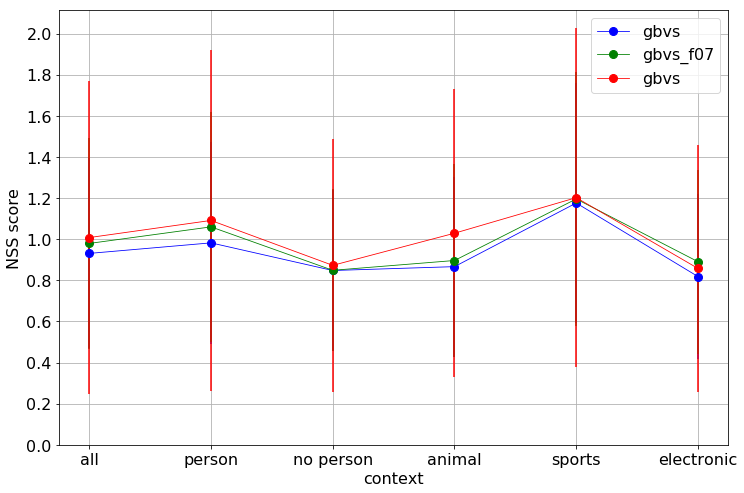

In [43]:
plt.subplots(figsize=(12,8))

plt.plot(gbvs_mean, '-o', label='gbvs', linewidth=d, markersize=m, c='b');
plt.errorbar(t, gbvs_mean, gbvs_std, linestyle='None', c='b', label=None)

plt.plot(gbvs_mean_f07, '-o', label='gbvs_f07', linewidth=d, markersize=m, c='g');
plt.errorbar(t, gbvs_mean_f07, gbvs_std_f07, linestyle='None', c='g', label=None)

plt.plot(dg_mean, '-o', label='gbvs', linewidth=d, markersize=m, c='r');
plt.errorbar(t, dg_mean, dg_std, linestyle='None', c='r', label=None)

plt.grid()
plt.yticks(np.arange(0, 2.1, step=0.2))
plt.ylabel('NSS score')
plt.xlabel('context')
plt.legend();

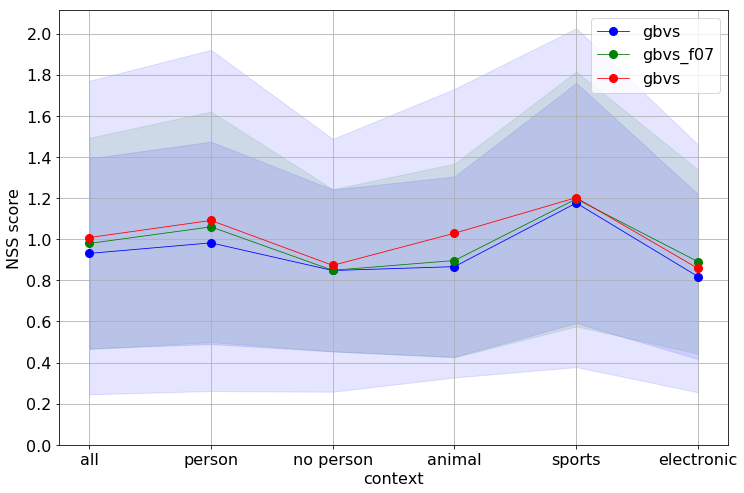

In [44]:
plt.subplots(figsize=(12,8))
plt.plot(gbvs_mean, '-o', label='gbvs', linewidth=d, markersize=m, c='b');
plt.fill_between(t, gbvs_mean - gbvs_std, gbvs_mean + gbvs_std, color='b', alpha=0.1)

plt.plot(gbvs_mean_f07, '-o', label='gbvs_f07', linewidth=d, markersize=m, c='g');
plt.fill_between(t, gbvs_mean_f07 - gbvs_std_f07, gbvs_mean_f07 + gbvs_std_f07, color='g', alpha=0.1)

plt.plot(dg_mean, '-o', label='gbvs', linewidth=d, markersize=m, c='r');
plt.fill_between(t, dg_mean - dg_std, dg_mean + dg_std, color='b', alpha=0.1)

plt.grid()
plt.yticks(np.arange(0, 2.1, step=0.2))
plt.ylabel('NSS score')
plt.xlabel('context')
plt.legend();

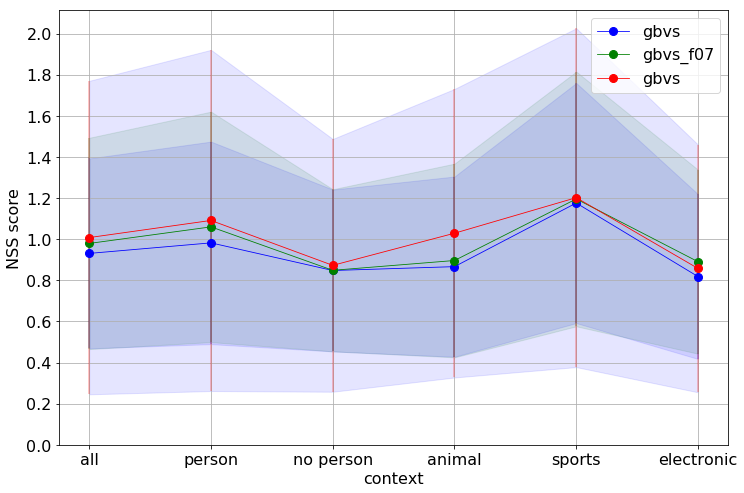

In [45]:
plt.subplots(figsize=(12,8))

plt.plot(gbvs_mean, '-o', label='gbvs', linewidth=d, markersize=m, c='b');
plt.errorbar(t, gbvs_mean, gbvs_std, linestyle='None', c='b', label=None, alpha=0.3)
plt.fill_between(t, gbvs_mean - gbvs_std, gbvs_mean + gbvs_std, color='b', alpha=0.1)

plt.plot(gbvs_mean_f07, '-o', label='gbvs_f07', linewidth=d, markersize=m, c='g');
plt.errorbar(t, gbvs_mean_f07, gbvs_std_f07, linestyle='None', c='g', label=None, alpha=0.3)
plt.fill_between(t, gbvs_mean_f07 - gbvs_std_f07, gbvs_mean_f07 + gbvs_std_f07, color='g', alpha=0.1)

plt.plot(dg_mean, '-o', label='gbvs', linewidth=d, markersize=m, c='r');
plt.errorbar(t, dg_mean, dg_std, linestyle='None', c='r', label=None, alpha=0.3)
plt.fill_between(t, dg_mean - dg_std, dg_mean + dg_std, color='b', alpha=0.1)

plt.grid()
plt.yticks(np.arange(0, 2.1, step=0.2))
plt.ylabel('NSS score')
plt.xlabel('context')
plt.legend();

### Plot GBVS + GBVS_f07 + GBVS_f05 + GBVS_f03 + DG

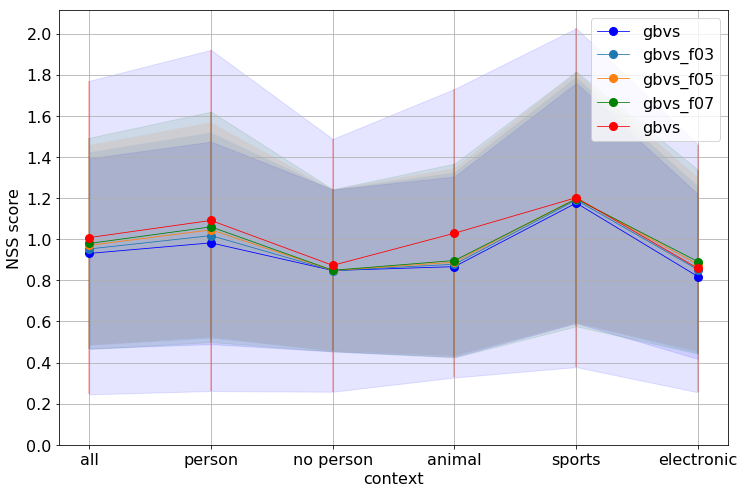

In [46]:
plt.subplots(figsize=(12,8))

plt.plot(gbvs_mean, '-o', label='gbvs', linewidth=d, markersize=m, c='b');
plt.fill_between(t, gbvs_mean - gbvs_std, gbvs_mean + gbvs_std, color='b', alpha=0.1)


plt.plot(gbvs_mean_f03, '-o', label='gbvs_f03', linewidth=d, markersize=m);
plt.fill_between(t, gbvs_mean_f03 - gbvs_std_f03, gbvs_mean_f03 + gbvs_std_f03, alpha=0.1)

plt.plot(gbvs_mean_f05, '-o', label='gbvs_f05', linewidth=d, markersize=m);
plt.fill_between(t, gbvs_mean_f05 - gbvs_std_f05, gbvs_mean_f05 + gbvs_std_f05, alpha=0.1)

plt.plot(gbvs_mean_f07, '-o', label='gbvs_f07', linewidth=d, markersize=m, c='g');
plt.errorbar(t, gbvs_mean_f07, gbvs_std_f07, linestyle='None', c='g', label=None, alpha=0.3)
plt.fill_between(t, gbvs_mean_f07 - gbvs_std_f07, gbvs_mean_f07 + gbvs_std_f07, color='g', alpha=0.1)

plt.plot(dg_mean, '-o', label='dg', linewidth=d, markersize=m, c='r');
plt.errorbar(t, dg_mean, dg_std, linestyle='None', c='r', label=None, alpha=0.3)
plt.fill_between(t, dg_mean - dg_std, dg_mean + dg_std, color='b', alpha=0.1)

plt.grid()
plt.yticks(np.arange(0, 2.1, step=0.2))
plt.ylabel('NSS score')
plt.xlabel('context')
plt.legend();

### Plot GBVS + GBVS_f07 + GBVS_f05 + GBVS_f03

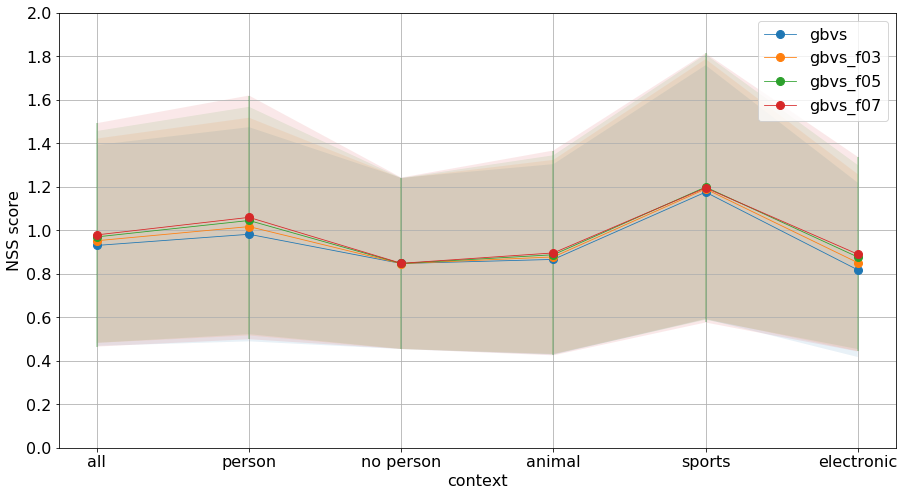

In [47]:
plt.subplots(figsize=(15,8))

plt.plot(gbvs_mean, '-o', label='gbvs', linewidth=d, markersize=m);
plt.fill_between(t, gbvs_mean - gbvs_std, gbvs_mean + gbvs_std, alpha=0.1)


plt.plot(gbvs_mean_f03, '-o', label='gbvs_f03', linewidth=d, markersize=m);
plt.fill_between(t, gbvs_mean_f03 - gbvs_std_f03, gbvs_mean_f03 + gbvs_std_f03, alpha=0.1)

plt.plot(gbvs_mean_f05, '-o', label='gbvs_f05', linewidth=d, markersize=m);
plt.fill_between(t, gbvs_mean_f05 - gbvs_std_f05, gbvs_mean_f05 + gbvs_std_f05, alpha=0.1)

plt.plot(gbvs_mean_f07, '-o', label='gbvs_f07', linewidth=d, markersize=m);
plt.errorbar(t, gbvs_mean_f07, gbvs_std_f07, linestyle='None', c='g', label=None, alpha=0.3)
plt.fill_between(t, gbvs_mean_f07 - gbvs_std_f07, gbvs_mean_f07 + gbvs_std_f07, alpha=0.1)

plt.grid()
plt.yticks(np.arange(0, 2.1, step=0.2))
plt.ylabel('NSS score')
plt.xlabel('context')
plt.legend();